#DIFFO MBOUDJIHO Annette Dariose.

#**Introduction to Modelling in epidemiology**

#Task

Find a publication that applies Bayesian inference in the field of epidemiology, such as in spatial statistics or disease transmission modeling.

Identify which Bayesian methods (such as MCMC, VI, ABC, etc) and models were employed in the paper.

Determine the inference tools applied in the study, such as PPL usage, custom MCMC samplers, or specialized libraries.

Do you think the modelling part of the study could be improved or extended in some way?

Answer:

 1-Publication:
 "Modelling the seasonal and spatial variation of malaria transmission in relation to mortality in Africa" by Susan Fred Rumisha applies Bayesian inference in the field of epidemiology.

 Link : https://core.ac.uk/download/pdf/18262454.pdf


2-Bayesian Methods and Models Employed:

-Bayesian Kriging:
The study utilized Bayesian Kriging to generate high-resolution maps of malaria transmission intensity (EIR) across space. This involved specifying prior distributions for spatial processes and updating them using observed entomological data to obtain posterior estimates.

-Bayesian Regression:
Bayesian regression models were employed to assess the relationship between malaria transmission and all-cause mortality. These models allowed for uncertainty quantification in model parameters and predictions, incorporating entomological and mortality data.

Bayesian Variable Selection:
Bayesian variable selection techniques were used to identify relevant environmental and climatic variables for predicting malaria transmission. This involved specifying prior distributions over model parameters and updating them based on entomological data.


Inference Tools Applied:

-Markov Chain Monte Carlo (MCMC):
MCMC methods were employed for posterior sampling in Bayesian regression and variable selection, facilitating estimation of posterior distributions of model parameters.
-Bayesian Information Criterion (BIC):
BIC were used as part of the Bayesian variable selection process to select subsets of covariates that best explain variations in malaria transmission, aiding in model selection.

Assessing the Modelling Part of the Study:

While the study effectively utilized Bayesian methods to analyze malaria transmission and mortality data, there are potential areas for improvement or extension:
-Exploration of additional Bayesian techniques:
Consideration of alternative Bayesian approaches such as Variational Inference (VI) or Approximate Bayesian Computation (ABC) could provide complementary perspectives into model fitting and inference.

-Incorporation of more complex models:
Further exploration of complex Bayesian models, such as spatio-temporal models or hierarchical models, could enhance the understanding of epidemiological dynamics and improve prediction accuracy.
Sensitivity analysis: Conducting sensitivity analyses to assess the robustness of model results to different priors, model specifications, or data assumptions could strengthen the reliability and generalizability of findings.
Validation and external replication: Validating model results using independent datasets or replicating the study in different geographical locations could enhance the credibility and reproducibility of the findings



#**Probability Distributions and Random Variables**

In [ ]:
# Install the numpyro package
!pip install numpyro

# Import JAX and its NumPy module
import jax
import jax.numpy as jnp
# Import distributions module from numpyro

import numpyro.distributions as dist
# Import pyplot module from matplotlib for plotting

import matplotlib.pyplot as plt
# Since we are using jax, we will need a random key:
# Generate a random key using jax.random.PRNGKey
rng = jax.random.PRNGKey(42)

Discrete Distributions

The Bernoulli distribution

Probability mass function

#Task

Convince yourself that the two definitions of the Bernoulli distribution shown above are equivalent


Definition 1: Using the probability of success $  p $  (where success corresponds to the outcome 1) and the probability of failure $  1-p $  (where failure corresponds to the outcome 0), we have:
$
p(X=x) = \begin{cases}
p & \text{if } x=1 \\
1-p & \text{if } x=0
\end{cases}
$

Definition 2: Using the Bernoulli distribution notation, we can write:

$ p(X=x) = \text{Bernoulli} (X|p) = p^x{(1-p)}^{1-x}$

Now, let's check whether these two definitions are equivalent by substituting values of $  x $  into the second definition:

- When $  x = 1 $ :
$
p(X=1) = p \times {(1-p)}^0 = p
$

- When $ x = 0 $:

$p(X=0) = p^0 \times {(1-p)}^1 = 1-P$


Both definitions yield the same probabilities for $  x = 1 $  and $  x = 0 $ . Therefore, the two definitions are indeed equivalent.


Drawing a sample



In [ ]:
# Create a JAX array representing the probability of success
p = jnp.array(0.5)
# Create a Bernoulli distribution with the specified probability of succes
bernoulli = dist.Bernoulli(probs=p)

sample = bernoulli.sample(key=rng)
# Print the generated sample
print(sample)

1


evaluate the probability of observing a sample

In [ ]:
log_prob = bernoulli.log_prob(sample)
print(f"log p(X = {sample}) = {log_prob}")
print(f"p(X = {sample}) = {jnp.exp(log_prob)}")

log p(X = 1) = -0.6931471824645996
p(X = 1) = 0.5


Multiple samples


In [ ]:
n_samps = 7
samples = bernoulli.sample(key=rng, sample_shape=(n_samps,))
print(samples)

[0 0 1 1 0 1 1]


In [ ]:
individual_sample_probs = jnp.exp(bernoulli.log_prob(samples))
print(individual_sample_probs)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5]


In [ ]:
joint_prob = jnp.prod(individual_sample_probs)
print(joint_prob)

0.0078125


Visualise PMF

In [ ]:
def Bernouilli_vis(rng, p, n_samps):

    # define distribution
    bernoulli = dist.Bernoulli(probs=p)

    # collect samples
    samples = bernoulli.sample(key=rng, sample_shape=(n_samps,))

    # how many ones
    num_ones = (samples == 1.).sum()

    # how many zeros
    num_zeros = (samples == 0.).sum()

    # plot
    fig = plt.figure(dpi=100, figsize=(5, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar([0, 1], [num_zeros/n_samps, num_ones/n_samps], alpha=0.7, color='teal')

    ax.set_xticks([0, 1])
    ax.set_xlabel('Outcome (x)')
    ax.set_ylabel('Probability Mass p(X=x)')
    ax.set_title(f'Bernoulli Distribution (p={p})')
    ax.grid(True)

    plt.show()


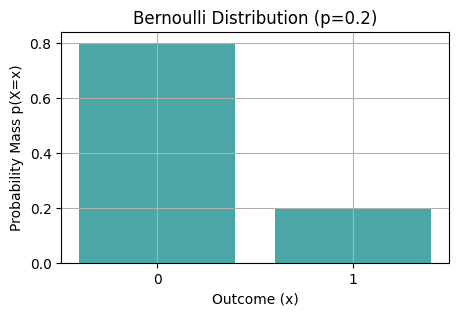

In [ ]:
    Bernouilli_vis(rng, p=0.2, n_samps=10)

#Task

Recreate this plot using bernoulli.log_prob(sample) functionality (see examples below).

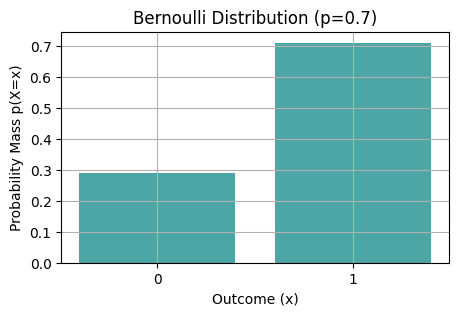

In [ ]:
def Bernouilli_vis(rng, p, n_samps):
    # Define distribution
    bernoulli = dist.Bernoulli(probs=p)

    # Collect samples
    samples = bernoulli.sample(key=rng, sample_shape=(n_samps,))

    # Calculate probabilities using log_prob
    log_probs = bernoulli.log_prob(samples)

    # Convert log probabilities to probabilities
    probs = jnp.exp(log_probs)

    # Plot
    fig = plt.figure(dpi=100, figsize=(5, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar([0, 1], [1 - jnp.mean(samples), jnp.mean(samples)], alpha=0.7, color='teal')

    ax.set_xticks([0, 1])
    ax.set_xlabel('Outcome (x)')
    ax.set_ylabel('Probability Mass p(X=x)')
    ax.set_title(f'Bernoulli Distribution (p={p})')
    ax.grid(True)

    plt.show()


Bernouilli_vis(rng, p=0.7, n_samps=100)


#Task

Plot a panel of histograms where you vary probability p
 horizontally and number of samples n
 vertically. What do you observe?

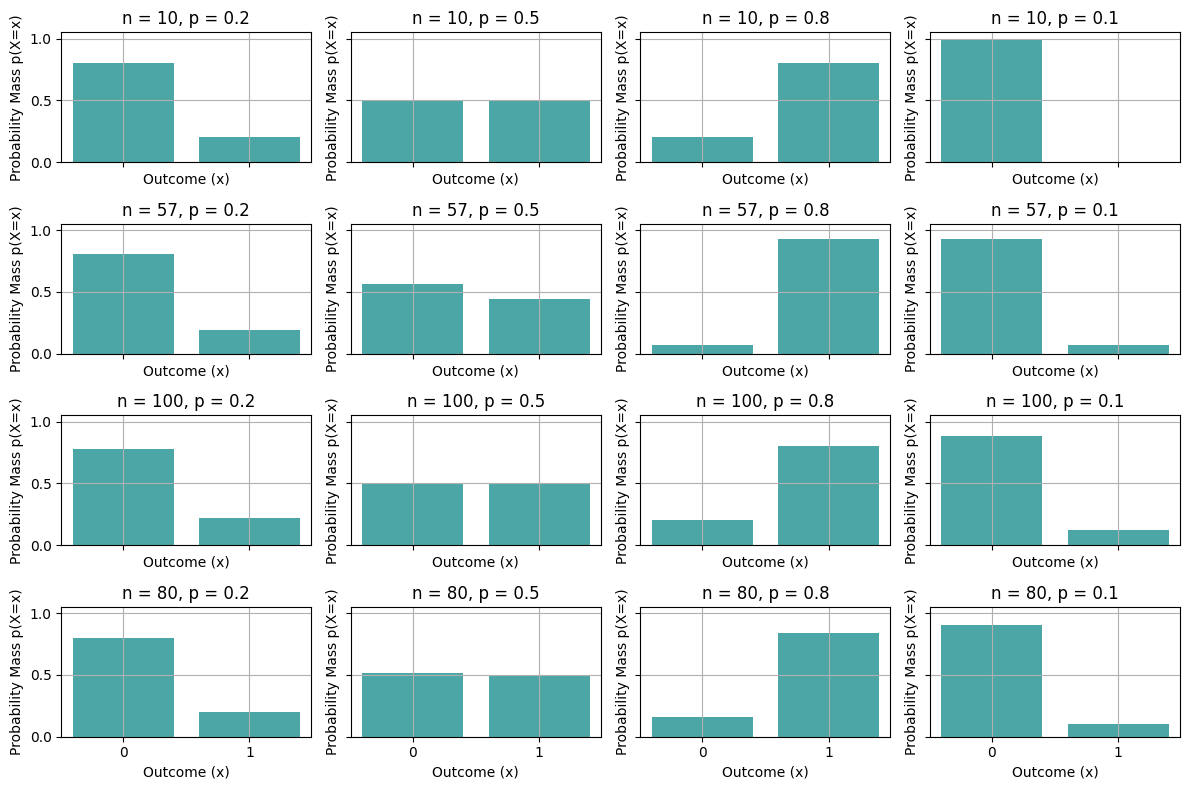

In [ ]:
def plot_panel_of_histograms(rng, ps, ns):
    fig, axs = plt.subplots(len(ns), len(ps), figsize=(12, 8), sharex=True, sharey=True)
    for i, n in enumerate(ns):
        for j, p in enumerate(ps):
            # Call Bernouilli_vis function to plot the histogram for each combination of p and n
            Bernouilli_vis(rng, p, n, ax=axs[i, j])
            axs[i, j].set_title(f'n = {n}, p = {p}')
    plt.tight_layout()
    plt.show()

# values for p and n
ps = [0.2, 0.5, 0.8, 0.1]
ns = [10, 57, 100, 80 ]

# Plot the panel of histograms
plot_panel_of_histograms(rng, ps, ns)


The Binomial distribution

Probability mass function

#Task

Compute

$ ∑_{x=0}^{n} P(X=x)
$


Given the binomial probability mass function (PMF):

$
P(X=x) = \binom{n}{x} p^x (1 - p)^{n - x}
$

The sum of probabilities can be calculated as:

$
\sum_{x=0}^{n} P(X=x) = \sum_{x=0}^{n} \binom{n}{x} p^x (1 - p)^{n - x}
$

Now, let's simplify this expression using the binomial theorem, which states that:

$
\sum_{x=0}^{n} \binom{n}{x} p^x (1 - p)^{n - x} = (p + (1 - p))^n = 1^n = 1
$

Therefore, the sum of probabilities for a binomial distribution is indeed 1.


Drawing a sample

In [ ]:
p = 0.3
n = 10
binomial = dist.Binomial(total_count=n, probs=p)

sample = binomial.sample(key=rng)
print(sample)

4


#Task

Draw several samples from this distribution using different keys. And draw repeatedly several samples with the same key. What do you conclude about the role of key in reproducibility of numerical experiments?

Using different keys gives us different results.

But when we use the same key, we get the same result each time.

So, the key controls whether our numerical experiments change or stay the same.

In [ ]:
from jax import random

# Define parameters
p = 0.3
n = 10

# Define values for keys
key_values_1 = (12, 45, 78)
key_values_2 = (98, 65, 32)

# Combine multiple values into a single integer for keys
key_1 = random.PRNGKey(jnp.sum(jnp.array(key_values_1)))
key_2 = random.PRNGKey(jnp.sum(jnp.array(key_values_2)))

# binomial sampling function
def binomial_sample(key):
    return random.binomial(key, n=n, p=p, shape=(1,))

# Draw samples using different keys
sample_1 = binomial_sample(key_1)
sample_2 = binomial_sample(key_2)

print("Samples with custom keys:")
print(sample_1)
print(sample_2)

# Draw samples repeatedly using the same key
repeated_samples_1 = binomial_sample(key_1)
repeated_samples_2 = binomial_sample(key_1)

print("\nRepeated samples with the same key:")
print(repeated_samples_1)
print(repeated_samples_2)


Samples with custom keys:
[2.]
[1.]

Repeated samples with the same key:
[2.]
[2.]


In [ ]:
log_prob = binomial.log_prob(sample)
print(f"log p(X = {sample}) = {log_prob}")
print(f"p(X = {sample}) = {jnp.exp(log_prob)}")

log p(X = 4) = -1.608832836151123
p(X = 4) = 0.20012104511260986


Multiple samples

In [ ]:
n_samps = 7
samples = binomial.sample(key=rng, sample_shape=(n_samps,))
print(samples)

[3 6 1 3 2 4 5]


In [ ]:
individual_sample_probs = jnp.exp(binomial.log_prob(samples))
print(individual_sample_probs)

[0.26682812 0.03675695 0.12106086 0.26682812 0.23347507 0.20012105
 0.10291947]


In [ ]:
joint_prob = jnp.prod(individual_sample_probs)
print(joint_prob)

1.5234818e-06


#### Visualise PMF

In [ ]:
def binomial_vis(rng, p, n, x_ticks=True):

    # Binomial distribution with n trials and probability of success p
    binomial = dist.Binomial(total_count=n, probs=p)

    # Generate the possible outcomes (x values)
    x_values = jnp.arange(0, n + 1)

    pmf_values = jnp.exp(binomial.log_prob(x_values))

    # Create a bar plot (PMF plot)
    fig = plt.figure(dpi=100, figsize=(5, 3))
    plt.bar(x_values, pmf_values, align='center', alpha=0.7, color='teal')
    plt.xlabel('Number of Successes (x)')
    plt.ylabel('Probability Mass p(X=x)')
    plt.title(f'Binomial Distribution (n={n}, p={p})')
    if x_ticks:
        plt.xticks(x_values)
    plt.grid( linestyle='--', alpha=0.7)

    plt.show()


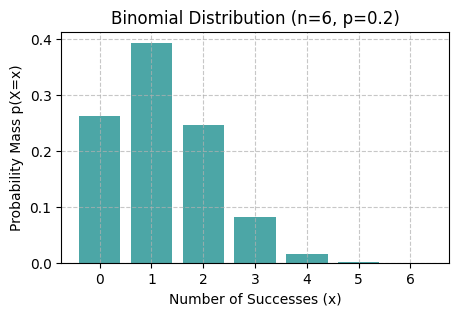

In [ ]:
binomial_vis(rng, p=0.2, n=6)

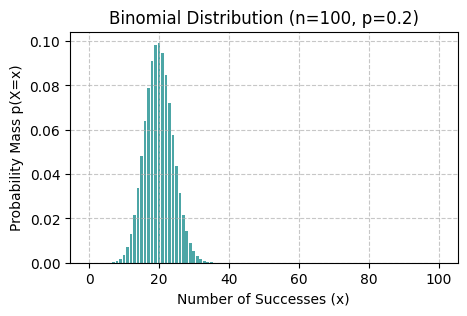

In [ ]:
binomial_vis(rng, p=0.2, n=100, x_ticks=False)

#Task

What is qualitatively different between the shapes of distributions Bernoulli(p=0.2, n=6) and Bernoulli(p=0.2, n=100)?

 the key qualitative difference is that the distribution with the larger sample Bernoulli(p=0.2, n=100) ,size will tend to have less variability and provide a more precise estimate of the true probability p compared to the distribution with the smaller sample size Bernoulli(p=0.2, n=6)

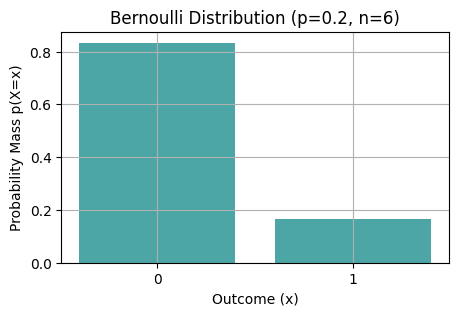

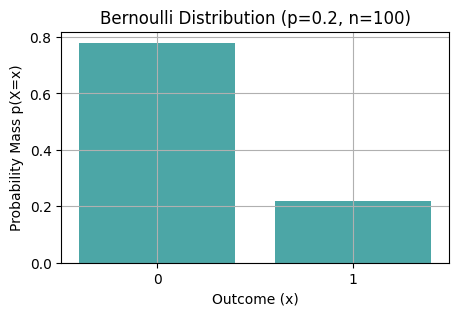

In [ ]:
def Bernouilli_vis(rng, p, n_samps):
    # Define distribution
    bernoulli = dist.Bernoulli(probs=p)

    # Collect samples
    samples = bernoulli.sample(key=rng, sample_shape=(n_samps,))

    # Calculate probabilities using log_prob
    log_probs = bernoulli.log_prob(samples)

    # Convert log probabilities to probabilities
    probs = jnp.exp(log_probs)

    # Plot
    fig = plt.figure(dpi=100, figsize=(5, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar([0, 1], [1 - jnp.mean(samples), jnp.mean(samples)], alpha=0.7, color='teal')

    ax.set_xticks([0, 1])
    ax.set_xlabel('Outcome (x)')
    ax.set_ylabel('Probability Mass p(X=x)')
    ax.set_title(f'Bernoulli Distribution (p={p}, n={n_samps})')
    ax.grid(True)

    plt.show()

# Define parameters
p = 0.2

# Call Bernouilli_vis function for n=6
Bernouilli_vis(rng, p=p, n_samps=6)

# Call Bernouilli_vis function for n=100
Bernouilli_vis(rng, p=p, n_samps=100)


The Categorical distribution

#Task

Explain why a categorical distribution with $K = 2$
 is equivalent to a Bernoulli distribution.

For a categorical distribution with $ K = 2 $, the PMF is:
$ p(X=x) = \text{categorical}(X \mid p) = p_1^{[x=1]} \cdot p_2^{[x=2]} $
where $ p = [p_1, p_2] $, $ p_1 $ and $ p_2 $ are the probabilities of the two outcomes, and $ [x=k] $ is the Iverson bracket which evaluates to 1 if $ x = k $ and 0 otherwise.

For a Bernoulli distribution, the PMF is:
$ p(X=x) = \begin{cases} p & \text{if } x = 1 \\ 1 - p & \text{if } x = 0 \end{cases} $

Now, let's set $ K = 2 $ in the categorical distribution, and $ p_1 = p $ and $p_2 = 1 - p $.

When $ x = 0 $, $ [x=1] = 0 $, and $ [x=2] = 1 $, so the PMF of the categorical distribution simplifies to:
$ p(X=0) = p_1^{[x=1]} \cdot p_2^{[x=2]} = p^0 \cdot (1 - p)^1 = 1 - p$

When $ x = 1 $, $ [x=1] = 1 $, and $ [x=2] = 0 $, so the PMF of the categorical distribution simplifies to:
$ p(X=1) = p_1^{[x=1]} \cdot p_2^{[x=2]} = p^1 \cdot (1 - p)^0 = p $

This matches exactly with the PMF of the Bernoulli distribution.

We can conclude that a categorical distribution with $ K = 2 $ is equivalent to a Bernoulli distribution when $ p_1 = p$ and $ p_2 = 1 - p $.


In [ ]:
ps = jnp.array([0.1, 0.2, 0.3, 0.4])
categorical = dist.Categorical(probs=ps)

In [ ]:
samples = categorical.sample(key=rng, sample_shape=(10,))
print(samples)

[3 2 1 3 3 1 2 1 3 3]


In [ ]:
print(f"p(X=0) = {jnp.exp(categorical.log_prob(0)):.1f}")
print(f"p(X=1) = {jnp.exp(categorical.log_prob(1)):.1f}")
print(f"p(X=2) = {jnp.exp(categorical.log_prob(2)):.1f}")
print(f"p(X=3) = {jnp.exp(categorical.log_prob(3)):.1f}")

p(X=0) = 0.1
p(X=1) = 0.2
p(X=2) = 0.3
p(X=3) = 0.4


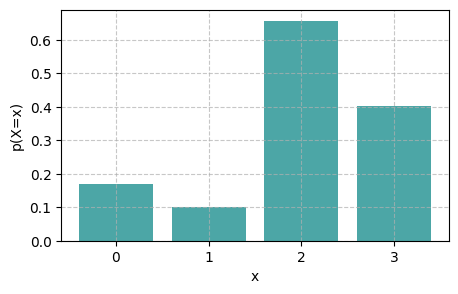

In [ ]:
l_0 = 0.7
l_1 = 0.3
l_2 = 2
l_3 = 1.6

logits = jnp.array([l_0, l_1, l_2, l_3], dtype=jnp.float32)
categorical = dist.Categorical(logits=logits)
samples = categorical.sample(key=rng, sample_shape=(1000,))

values =[0, 1, 2, 3]
num_bins = len(values)

hist, _ = jnp.histogram(samples, bins=num_bins, density=True)

fig = plt.figure(dpi=100, figsize=(5, 3))
plt.bar(values, hist, color='teal', alpha=0.7)
plt.xticks(values)
plt.xlabel('x')
plt.ylabel('p(X=x)')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

The Ordinal distribution

In [ ]:
# Define study hours for each student
study_hours = jnp.array([5, 7, 3, 10, 8, 6, 4, 9, 2, 7])

# Define cutpoints for the ordered categories
cutpoints = jnp.array([0., 5., 7., 10.])  # Ordered categories: (0, 5], (5, 7], (7, 10]

# Sample logits (unnormalized probabilities) based on study hours
logits = 0.5 * study_hours

ordinal = dist.OrderedLogistic(logits, cutpoints)

In [ ]:
# Sample from the OrderedLogistic distribution
ordinal = dist.OrderedLogistic(logits, cutpoints)
samples = ordinal.sample(rng, (1000,))

Continuous Distributions

The Beta distribution

#Task

Try making each parameter big or small while leaving the other at the same value.

Then try make them both big or small

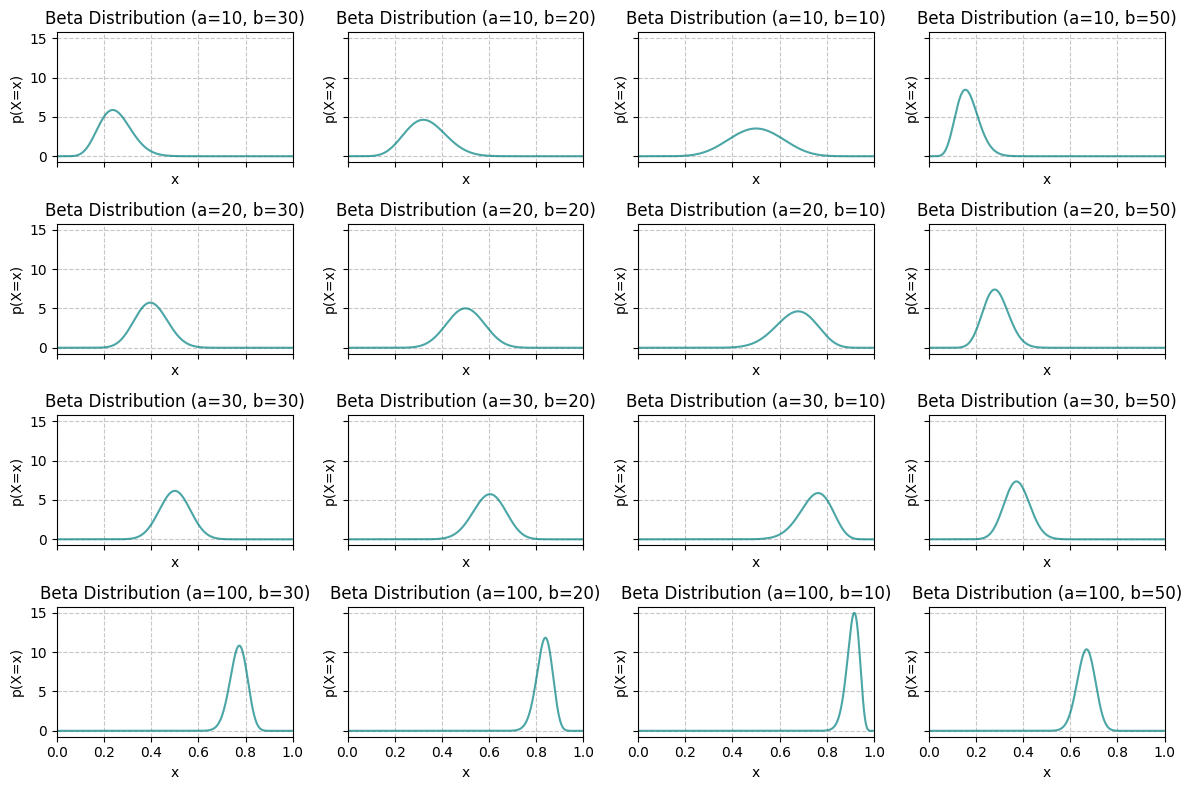

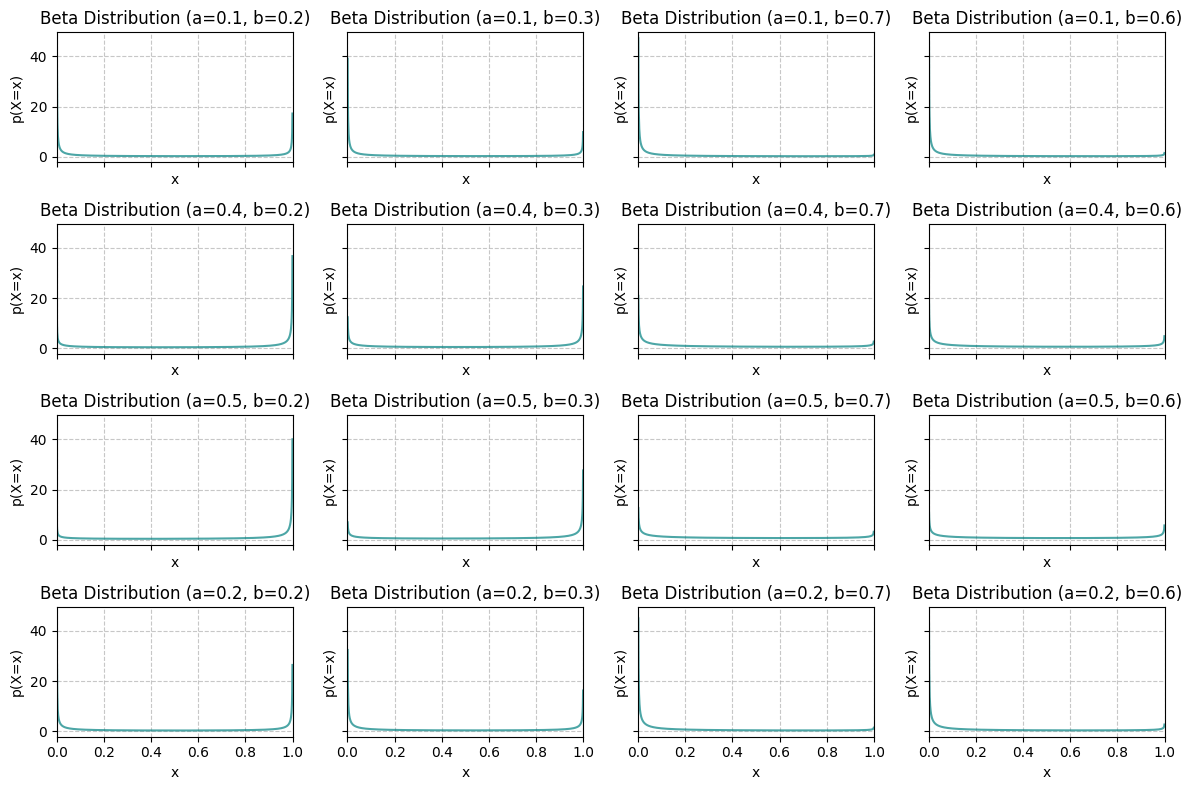

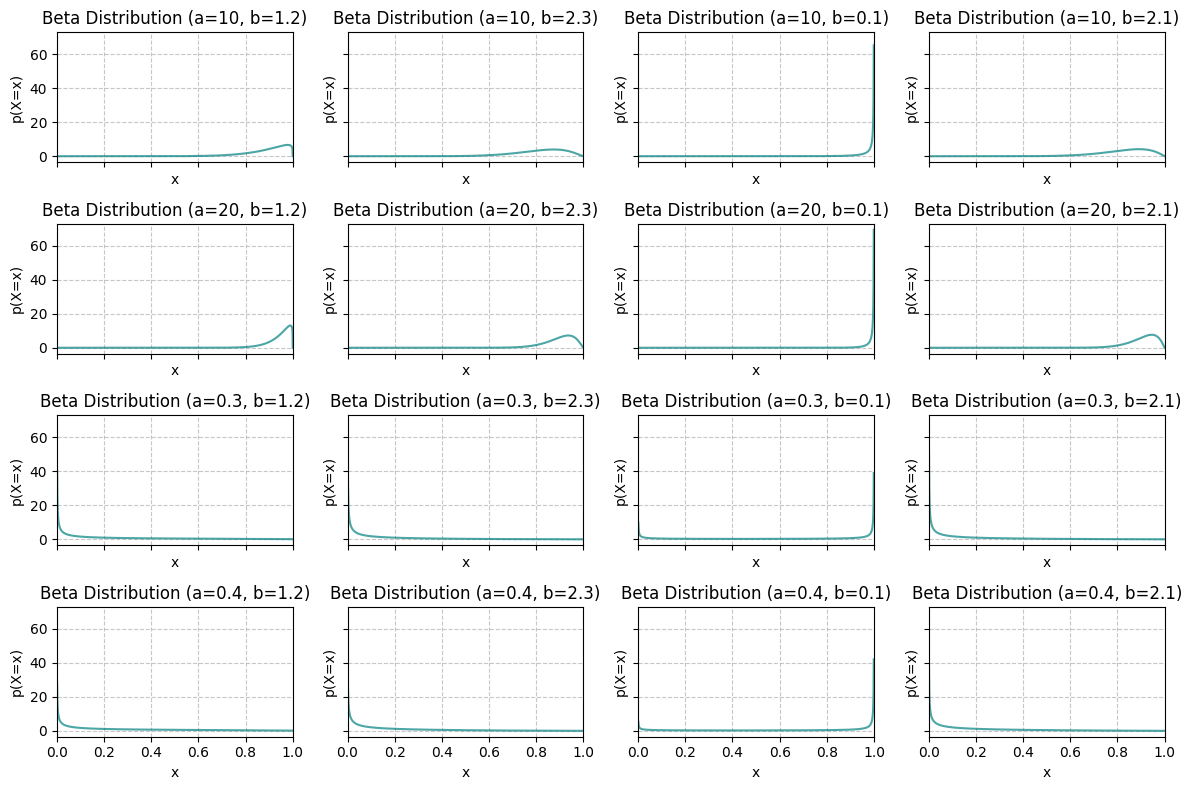

In [ ]:
def beta_vis(a_values, b_values, x_ticks=True):
    x_values = jnp.linspace(0, 1, 1000)
    fig, axs = plt.subplots(len(a_values), len(b_values), figsize=(12, 8), sharex=True, sharey=True)

    for i, a in enumerate(a_values):
        for j, b in enumerate(b_values):
            beta = dist.Beta(a, b)
            pmf_values = jnp.exp(beta.log_prob(x_values))

            axs[i, j].plot(x_values, pmf_values, alpha=0.7, color='teal')
            axs[i, j].set_title(f'Beta Distribution (a={a}, b={b})')
            axs[i, j].set_xlabel('x')
            axs[i, j].set_ylabel('p(X=x)')
            axs[i, j].grid(axis='y', linestyle='--', alpha=0.7)
            axs[i, j].grid(axis='x', linestyle='--', alpha=0.7)
            axs[i, j].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

# Define sets of values for a and b
a_big = [10, 20, 30, 100]
b_big = [30, 20, 10, 50]

a_small = [0.1, 0.4, 0.5, 0.2]
b_small = [0.2, 0.3, 0.7, 0.6]

a_big_b_small = [10, 20,  0.3, 0.4]
b_big_a_small = [1.2, 2.3, 0.1, 2.1]

# Visualize Beta distributions with both parameters big or small
beta_vis(a_big, b_big, x_ticks=False)
beta_vis(a_small, b_small, x_ticks=False)

# Visualize Beta distributions with one parameter big and the other small
beta_vis(a_big_b_small, b_big_a_small, x_ticks=False)


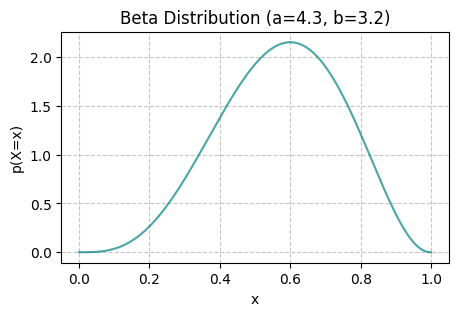

In [ ]:
def beta_vis(a, b, x_ticks=True):

    beta = dist.Beta(a, b)

    x_values = jnp.linspace(0, 1, 1000)

    pmf_values = jnp.exp(beta.log_prob(x_values))

    fig = plt.figure(dpi=100, figsize=(5, 3))
    plt.plot(x_values, pmf_values, alpha=0.7, color='teal')
    plt.xlabel('x')
    plt.ylabel('p(X=x)')
    plt.title(f'Beta Distribution (a={a}, b={b})')
    if x_ticks:
        plt.xticks(x_values)
    plt.grid( linestyle='--', alpha=0.7)

    plt.show()

beta_vis(a=4.3, b=3.2, x_ticks=False)

The Gamma distribution



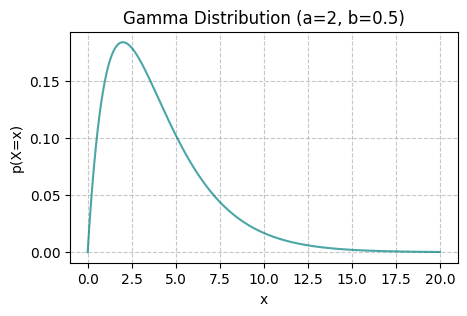

In [ ]:
def gamma_vis(a, b, x_ticks=True):

    gamma = dist.Gamma(a, b)

    x_values = jnp.linspace(0, 20, 1000)

    pmf_values = jnp.exp(gamma.log_prob(x_values))

    fig = plt.figure(dpi=100, figsize=(5, 3))
    plt.plot(x_values, pmf_values, alpha=0.7, color='teal')
    plt.xlabel('x')
    plt.ylabel('p(X=x)')
    plt.title(f'Gamma Distribution (a={a}, b={b})')
    if x_ticks:
        plt.xticks(x_values)
    plt.grid( linestyle='--', alpha=0.7)

    plt.show()

gamma_vis(a=2, b=0.5, x_ticks=False)

The Uniform distribution

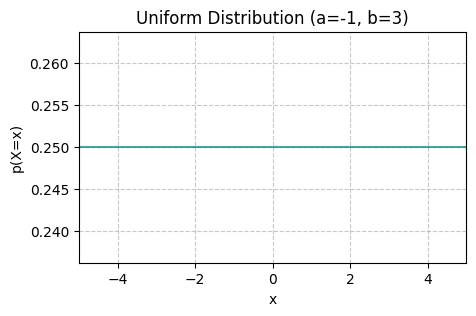

In [ ]:
def uniform_vis(a, b, x_ticks=True):

    uniform = dist.Uniform(low=a, high=b)
    x_values = jnp.linspace(-5, 5, 1000)

    pmf_values = jnp.exp(uniform.log_prob(x_values))

    fig = plt.figure(dpi=100, figsize=(5, 3))
    plt.plot(x_values, pmf_values, alpha=0.7, color='teal')
    plt.xlabel('x')
    plt.ylabel('p(X=x)')
    plt.title(f'Uniform Distribution (a={a}, b={b})')
    if x_ticks:
        plt.xticks(x_values)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.xlim(-5, 5)

    plt.show()

uniform_vis(a=-1, b=3, x_ticks=False)

The Normal distribution

#Task

How do the mean and standard deviation affect the samples?

The mean controls where the center of the distribution is located. In other words, it controls where the most likely location to sample a value is.

The standard deviation controls how wide the distribution is. In other words, it controls how likely we are to draw samples farther away from the mean.

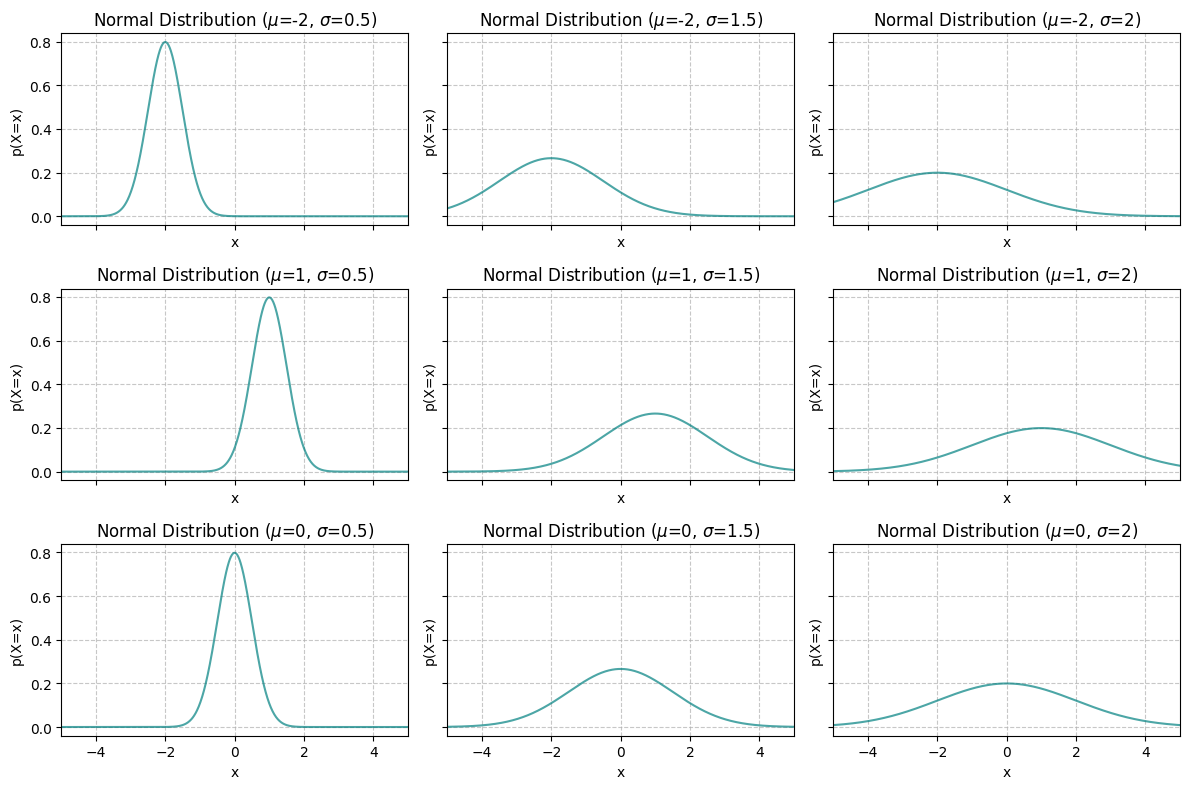

In [ ]:
def norm_vis(mu_values, sigma_values):
    x_values = jnp.linspace(-5, 5, 1000)
    fig, axs = plt.subplots(len(mu_values), len(sigma_values), figsize=(12, 8), sharex=True, sharey=True)

    for i, mu in enumerate(mu_values):
        for j, sigma in enumerate(sigma_values):
            normal = dist.Normal(loc=mu, scale=sigma)
            pmf_values = jnp.exp(normal.log_prob(x_values))

            axs[i, j].plot(x_values, pmf_values, alpha=0.7, color='teal')
            axs[i, j].set_title(f'Normal Distribution ($\mu$={mu}, $\sigma$={sigma})')
            axs[i, j].set_xlabel('x')
            axs[i, j].set_ylabel('p(X=x)')
            axs[i, j].grid(axis='y', linestyle='--', alpha=0.7)
            axs[i, j].grid(axis='x', linestyle='--', alpha=0.7)
            axs[i, j].set_xlim(-5, 5)

    plt.tight_layout()
    plt.show()


mu_values = [-2, 1, 0]
sigma_values = [0.5, 1.5, 2]


norm_vis(mu_values=mu_values, sigma_values=sigma_values)


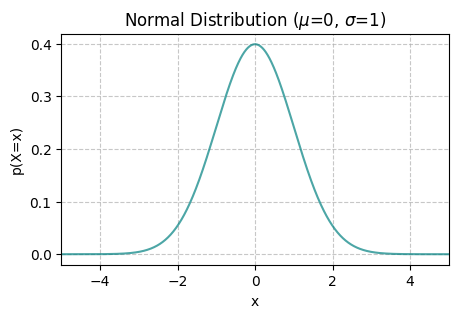

In [ ]:
def norm_vis(mu, sigma, x_ticks=False):

    normal = dist.Normal(loc=mu, scale=sigma)

    x_values = jnp.linspace(-5, 5, 1000)

    pmf_values = jnp.exp(normal.log_prob(x_values))

    fig = plt.figure(dpi=100, figsize=(5, 3))
    plt.plot(x_values, pmf_values, alpha=0.7, color='teal')
    plt.xlabel('x')
    plt.ylabel('p(X=x)')
    plt.title(f'Normal Distribution ($\mu$={mu}, $\sigma$={sigma})')
    if x_ticks:
        plt.xticks(x_values)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.xlim(-5, 5)

    plt.show()

norm_vis(mu = 0, sigma = 1 )

#Task

Implement the PDF of the Normal dsitribution and test it using the fcuntion provided below

In [ ]:
def normal_pdf(loc, scale, x):
    p_x = 1 / jnp.sqrt(2 * jnp.pi * scale**2)
    p_x *= jnp.exp(-((loc - x)**2) / (2 * scale**2))

    return p_x


In [ ]:
def test_normal_pdf(pdf_fn, run=False):
  if not run:
    return
  assert pdf_fn(0, 1, 0) == jnp.exp(dist.Normal(loc=0, scale=1).log_prob(0)), "Normal(X=0|0, 1) is incorrect."
  assert pdf_fn(0, 2, 0) == jnp.exp(dist.Normal(loc=0, scale=2).log_prob(0)), "Normal(X=0|0, 2) is incorrect."
  assert pdf_fn(0, 1, 1) == jnp.exp(dist.Normal(loc=0, scale=1).log_prob(1)), "Normal(X=0|1, 1) is incorrect."
  assert pdf_fn(2, 3, 1) == jnp.exp(dist.Normal(loc=2, scale=3).log_prob(1)), "Normal(X=1|2, 3) is incorrect."

print("Nice! Your answer looks correct.")


Nice! Your answer looks correct.


In [ ]:
test_normal_pdf(normal_pdf)

The Multivariate Normal distribution

#Task

Show that the equation above is equivalent to the univariate case when $D=1$


In the multivariate Normal distribution, the probability density function (PDF) is given by:

$
f(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{(2\pi)^{\frac{D}{2}} |\boldsymbol{\Sigma}|^\frac{1}{2}} \exp \left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right)
$

When $D = 1$, the covariance matrix $\boldsymbol{\Sigma}$ becomes a scalar, denoted as $\sigma^2$. Therefore, the equation simplifies to the univariate case of the Normal distribution:

$
f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$

This is the same equation as the PDF of the univariate Normal distribution.


Batch and event shapes

In [ ]:
values = jnp.array([1., 2.])
normal = dist.Normal(0., 1.)
print(f"event_shape = {normal.event_shape}")
print(f"batch_shape = {normal.batch_shape}")
print(f"p(X = {values}) = {jnp.exp(normal.log_prob(values))}")

event_shape = ()
batch_shape = ()
p(X = [1. 2.]) = [0.24197073 0.05399096]


In [ ]:
batch_normal = dist.Normal(jnp.array([0., 1.]), jnp.array([1., 2.]))
print(f"event_shape = {batch_normal.event_shape}")
print(f"batch_shape = {batch_normal.batch_shape}")
print(f"[p(X_1 = {values[0]}), p(X_2 = {values[1]})] = {jnp.exp(batch_normal.log_prob(values))}")
print(f"p(X_1 = {values[0]}, X_2 = {values[1]}) = {jnp.prod(jnp.exp(batch_normal.log_prob(values)))}")

event_shape = ()
batch_shape = (2,)
[p(X_1 = 1.0), p(X_2 = 2.0)] = [0.24197073 0.17603266]
p(X_1 = 1.0, X_2 = 2.0) = 0.042594753205776215


In [ ]:
multivariate_full_normal = dist.MultivariateNormal(jnp.array([0., 1.]), jnp.array([[1., 1.], [1., 2.**2]]))
print(f"event_shape = {multivariate_full_normal.event_shape}")
print(f"batch_shape = {multivariate_full_normal.batch_shape}")
print(f"p(X_1 = {values[0]}, X_2 = {values[1]}) = {jnp.exp(multivariate_full_normal.log_prob(values))}")

event_shape = (2,)
batch_shape = ()
p(X_1 = 1.0, X_2 = 2.0) = 0.055732980370521545


Measuring distances between distributions

#Task

1. Implement numeric evaluation of the KL divergence:

```
def kl_divergence(p: dist.Distribution, q: dist.Distribution, n: int = 10_000):
    """
    add your code here
    """  
    pass
```

2. Calculate the following KL divergence. What do we see?
    - $\mathrm{KLD}\left[\mathrm{Uniform}(0, 1) \mid\mid \mathrm{Uniform}(0, 1)\right]$
    - $\mathrm{KLD}\left[\mathrm{Beta}(5, 2) \mid\mid \mathrm{Beta}(5, 2)\right]$
  
3. Calculate the following KL divergences. What can we say about the relationship between the beta and uniform distributions?
    - What is $\mathrm{KLD}\left[\mathrm{Uniform}(0, 1) \mid\mid \mathrm{Beta}(5, 2)\right]$?
    - What is $\mathrm{KLD}\left[\mathrm{Uniform}(0, 1) \mid\mid \mathrm{Beta}(2, 2)\right]$?
    - What is $\mathrm{KLD}\left[\mathrm{Uniform}(0, 1) \mid\mid \mathrm{Beta}(1, 1)\right]$?
  
4. What is $\mathrm{KLD}\left[ \mathrm{Beta}(5, 2) \mid\mid \mathrm{Uniform}(0, 1)\right]$. How does it compare to $D_\mathrm{KL}\left[\mathrm{Uniform}(0, 1) \mid\mid \mathrm{Beta}(5, 2)\right]$ from above?

5. Compare $\mathrm{KLD}\left[\mathrm{Uniform}(-1, 1) \mid\mid \mathcal{N}(0, 1)\right]$ and $D_\mathrm{KL}\left[\mathcal{N}(0, 1) \mid\mid  \mathrm{Uniform}(-1, 1) \right]$.
`````

Answer:

In [ ]:
def kl_divergence(p: dist.Distribution, q: dist.Distribution, n: int = 10_000):
    xs = p.sample(rng, sample_shape = (n,))
    p_log_probs = p.log_prob(xs)
    q_log_probs = q.log_prob(xs)

    return -(q_log_probs - p_log_probs).mean()

In [ ]:
from jax import random

rng = random.PRNGKey(0)

def kl_divergence(p, q, n=10_000):
    xs = p.sample(rng, sample_shape=(n,))
    p_log_probs = p.log_prob(xs)
    q_log_probs = q.log_prob(xs)

    return -(q_log_probs - p_log_probs).mean()

# 2. KL divergences for same distributions
kl_uniform_uniform = kl_divergence(dist.Uniform(0, 1), dist.Uniform(0, 1))
kl_beta_beta = kl_divergence(dist.Beta(5, 2), dist.Beta(5, 2))

# 3. KL divergences from Uniform to Beta
kl_uniform_to_beta_5_2 = kl_divergence(dist.Uniform(0, 1), dist.Beta(5, 2))
kl_uniform_to_beta_2_2 = kl_divergence(dist.Uniform(0, 1), dist.Beta(2, 2))
kl_uniform_to_beta_1_1 = kl_divergence(dist.Uniform(0, 1), dist.Beta(1, 1))

# 4. KL divergence from Beta to Uniform
kl_beta_to_uniform_5_2 = kl_divergence(dist.Beta(5, 2), dist.Uniform(0, 1))

# 5. KL divergences between Uniform and Normal
kl_uniform_to_normal = kl_divergence(dist.Uniform(-1, 1), dist.Normal(0, 1))
kl_normal_to_uniform = kl_divergence(dist.Normal(0, 1), dist.Uniform(-1, 1))

print("2. KL Divergence (Uniform vs. Uniform):", kl_uniform_uniform)
print("   KL Divergence (Beta vs. Beta):", kl_beta_beta)
print("3. KL Divergence (Uniform to Beta(5,2)):", kl_uniform_to_beta_5_2)
print("   KL Divergence (Uniform to Beta(2,2)):", kl_uniform_to_beta_2_2)
print("   KL Divergence (Uniform to Beta(1,1)):", kl_uniform_to_beta_1_1)
print("4. KL Divergence (Beta(5,2) to Uniform):", kl_beta_to_uniform_5_2)
print("5. KL Divergence (Uniform(-1,1) to Normal(0,1)):", kl_uniform_to_normal)
print("   KL Divergence (Normal(0,1) to Uniform(-1,1)):", kl_normal_to_uniform)



2. KL Divergence (Uniform vs. Uniform): -0.0
   KL Divergence (Beta vs. Beta): -0.0
3. KL Divergence (Uniform to Beta(5,2)): 1.6020877
   KL Divergence (Uniform to Beta(2,2)): 0.22170918
   KL Divergence (Uniform to Beta(1,1)): 9.536743e-07
4. KL Divergence (Beta(5,2) to Uniform): 0.4855329
5. KL Divergence (Uniform(-1,1) to Normal(0,1)): 0.39478928
   KL Divergence (Normal(0,1) to Uniform(-1,1)): -0.7369558


2. Both KL divergences are 0, since $p = q$.
3. As the beta distributions shape parameters both get closer to 1, the KL divergence gets smaller, until the KL divergence becomes $\approx 0$, when both shape parameters are 1. This means that ${Beta}(1, 1)$ is a uniform distribution between 0 and 1.
4. As expected, $D_\mathrm{KL}\left[ \mathrm{Beta}(5, 2) \mid\mid \mathrm{Uniform}(0, 1)\right] \ne D_\mathrm{KL}\left[ \mathrm{Uniform}(0, 1) \mid\mid \mathrm{Beta}(5, 2)\right]$
5. While the first KL divergence is valid, the second is $\infty$.

#**End Probability Distributions and Random Variables**

#**Bayesian inference**

#Task: Point estimates for Bernoulli-beta coin flips

Consider the coin flipping problem with probability of heads ('success') being modelled as $p$. The experiment was repeated $n$ times, and we observed $h$ 'sucesses'. Assume that the coin flips follow the Bernoulli distribution $\mathcal{Bern}(p)$.

- Derive the <font color='orange'>maximum likelihood estimate (MLE)</font> for parameter $p$

$$
\hat{\theta}_\text{MLE} = {\arg \max}_\theta p(y | \theta)
$$

- How does the amount of data affect the MLE estimate?

- Derive the <font color='orange'>maximum aposteriori estimate (MAP)</font> for parameter $p$, using a $\mathcal{Beta}(a,b)$ prior

$$
\hat{\theta}_\text{MAP} = {\arg \max}_\theta p(y | \theta)p(\theta)
$$

- How does the amount of data and parameters of the Beta distribution affect the MLE estimate?

- Visualise MAP as a function of $n, h, a, b$.

- What is the difference between the two approaches?  Does a point estimate tell us anything about our uncertainty or the distribution from which we draw the estimate?


**Solution**

1-Given that the coin flips follow a Bernoulli distribution $\text{Bern}(p)$, the likelihood function for observing $h$ successes in $n$ trials $p(h_i \vert p)$ is :

\begin{eqnarray*}
\mathcal{L}(p) = \prod_{i=1}^N p(h_i \vert p)
\end{eqnarray*} \\

The **negative log**of the Bernoulli distribution is:

\begin{eqnarray*}
NLL(p) &=& - \log \prod_{i=1}^N p(h_i \vert p) \\
&=& -\log \Bigg[ \prod_{i=1}^N p^{h_i} (1-p)^{(1-h_i)} \Bigg] \\
\end{eqnarray*} \\



\begin{eqnarray*}
NLL(p) &=& - \sum_{i=1}^N \bigg[h_i \log(p) + (1-h_i)\log(1-p)\bigg] \\
&=& - \Bigg[\sum_{i=1}^N h_i \Bigg] \log(p) - \Bigg[\sum_{i=1}^N 1-h_i \Bigg]\log(1-p) \\
\end{eqnarray*} \\

Since we the experiment was repeated n
 times, and we observed h
 ‘sucesses:

\begin{eqnarray*}
NLL(p) &=& - h \log(p) - (n-h) \log(1-p) \\
&=& - \Big[ h \log(p) + (n-h) \log(1-p)\Big]
\end{eqnarray*}

To find the MLE estimate for
$ p $, we maximize this likelihood function with respect to
$p$. Taking the derivative with respect to $p $ and setting it to zero:

$\frac{d}{dp} \text{NLL}(p) = 0$

$⇒$

\begin{eqnarray*}
  0 &=& \frac{d}{dp} \text{NLL}(p) \\
  &=& \frac{d}{dp} \bigg[ - \Big[ h \log(p) + (n-h) \log(1-p)\Big]\bigg] \\
  &=& -h \frac{d}{dp}\big[\log(p)\big] -(n-h) \frac{d}{dp} \big[\log(1-\theta)\big]\\
\end{eqnarray*} \\

Solving this equation gives the MLE estimate:
\begin{eqnarray*}
  0 &=& -\frac{h}{p} + \frac{n-h}{1-p} \\  
  &\implies & \hat{p}_{MLE} = \frac{h}{h+n-h} = \frac{h}{n}\\
  &\implies & \hat{p}_{MLE} = \frac{h}{n}
\end{eqnarray*} \\

2-
As n increases, the MLE estimate
$\hat{p}_{MLE} = \frac{h}{n}$ converges towards the true probability
p. This is because with more trials, there is more information available about the distribution of the data, leading to a more precise estimation of p.

So,It doesn't take into account the amount of data we have fed it.

There is no notion of uncertainty.

MLE is prone to overfitting because it may perfectly fit the empirical data we give it, but not predict well on future data.

3-The beta distribution for the <font color='purple'>`prior`</font>, $p(\theta) = \text{Beta}(\theta \mid a,b)$ is:

\begin{equation*}
p(\theta \mid a,b) = \text{Beta} (\theta \mid a,b) = \frac{\theta^{a-1}(1-\theta)^{b-1}}{\beta(a,b)}
\end{equation*}

We know $\mathcal{L}(\theta) = \log p(\mathcal{y}\mid \theta)+\log p(\theta)$ and recall that we have already calculated $\log p(\mathcal{y}\mid\theta)$

So, taking the derivative of the log likelihood and setting to 0:

\begin{eqnarray*}
\mathcal{L}(p) &=& \log p(\mathcal{y}\mid p)\log p(p) \\
&=& \big[ N_1 \log p + N_0 \log (1-p)\big] + \big[(a-1)\log(p)+(b-1)\log(1-p)\big] \\
\implies 0 &=& \frac{d}{dp} \big[ h \log (p) + (n-h) \log (1-p)\big] + \big[(a-1)\log(p)+(b-1)\log(1-p)\big] \\
\implies 0 &=& \frac{h + a-1}{p} - \frac{n-h+b-1}{ (1-p)} \\
\end{eqnarray*}

rearranging and solving for $p$ gives:
\begin{equation*}
\implies \hat{p}_{MLE}= \hat{ \theta}_{MAP}  = \frac{h + a -1}{h + n-h + a +b -2}\\
\implies \hat{p}_{MLE}= \theta_{MAP} = \frac{h + a -1}{n + a +b -2}
\end{equation*}



4-
Increasing the number of coin flips (n) typically leads to a more precise and reliable maximum likelihood estimate (MLE) of the probability of heads (p).
The choice of parameters (a and b) in the Beta prior affects the MLE estimate by influencing its bias and variability, especially with limited data.
More data reduces the influence of the prior and improves the accuracy of the MLE estimate, while the prior parameters can introduce biases and affect the regularization of the estimate

In [ ]:
#5-Visualise MAP as a function of $n, h, a, b$
def map_estimate(H, N, α, β):
  p_map = (H + α - 1)/(N + α + β - 2) ##  the number of heads (H) and total flips (N)
  return p_map

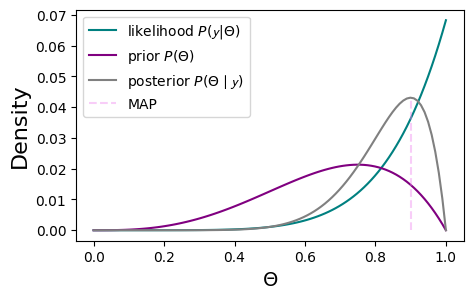

In [ ]:
import scipy.stats as stats

#5-Visualise MAP as a function of $n, h, a, b$
def map_estimate(H, N, α, β):
  p_map = (H + α - 1)/(N + α + β - 2) ##  the number of heads (H) and total flips (N)
  return p_map


# define grid
grid_points=100

# define regular grid in the (0,1) interval
p_grid = jnp.linspace(0, 1, grid_points)

#Example usage
n = 6
h = 6
α = 4
β = 2

# compute likelihood at each point in the grid
likelihood = stats.binom.pmf(h, n, p_grid)/jnp.sum(stats.binom.pmf(h, n, p_grid))

# Bayesian
# prior, then normalise
log_prob_prior = dist.Beta(α, β).log_prob(p_grid)
prior = jnp.exp(log_prob_prior - jnp.max(log_prob_prior)) / jnp.sum(jnp.exp(log_prob_prior - jnp.max(log_prob_prior)))
# posterior, then normalise
log_prob_post = dist.Beta(α+h, β+n-h).log_prob(p_grid)
post = jnp.exp(log_prob_post - jnp.max(log_prob_post)) / jnp.sum(jnp.exp(log_prob_post - jnp.max(log_prob_post)))

fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(p_grid, likelihood,color='teal',label='likelihood $P(\mathcal{y}|\Theta)$')

ax.plot(p_grid, prior, label='prior $P(\Theta)$', c='purple')
ax.plot(p_grid, post, label='posterior $P(\Theta \mid \mathcal{y})$', c='gray')
ax.vlines(map_estimate(H=h, N=n, α=α, β=β),0, max(post), color='violet', linestyle='dashed', alpha=0.4, label='MAP')
ax.set_xlabel('$\Theta$', fontsize=14)
ax.set_ylabel('Density', fontsize=16)
ax.legend()
plt.show()

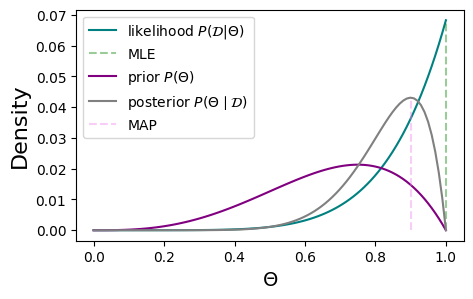

In [ ]:
#6-the difference between the two approaches


def mle(H, N):
  p_mle = H/N
  return p_mle


def map_estimate(H, N, α, β):
  p_map = (H + α - 1)/(N + α + β - 2) ##  write this in terms of the number of heads (H) and total flips (N)
  return p_map


# define grid
grid_points=100

# define regular grid in the (0,1) interval
p_grid = jnp.linspace(0, 1, grid_points)

#Example usage
n = 6
h = 6
α = 4
β = 2

# compute likelihood at each point in the grid
likelihood = stats.binom.pmf(h, n, p_grid)/jnp.sum(stats.binom.pmf(h, n, p_grid))

# Bayesian
# prior, then normalise
log_prob_prior = dist.Beta(α, β).log_prob(p_grid)
prior = jnp.exp(log_prob_prior - jnp.max(log_prob_prior)) / jnp.sum(jnp.exp(log_prob_prior - jnp.max(log_prob_prior)))
# posterior, then normalise
log_prob_post = dist.Beta(α+h, β+n-h).log_prob(p_grid)
post = jnp.exp(log_prob_post - jnp.max(log_prob_post)) / jnp.sum(jnp.exp(log_prob_post - jnp.max(log_prob_post)))

fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(p_grid, likelihood,color='teal',label='likelihood $P(\mathcal{D}|\Theta)$')
ax.vlines(mle(H=h, N=n), 0, max(likelihood),color='green',label='MLE',linestyle='--',alpha=0.4)
ax.plot(p_grid, prior, label='prior $P(\Theta)$', c='purple')
ax.plot(p_grid, post, label='posterior $P(\Theta \mid \mathcal{D})$', c='gray')
ax.vlines(map_estimate(H=h, N=n, α=α, β=β),0, max(post), color='violet', linestyle='dashed', alpha=0.4, label='MAP')
ax.set_xlabel('$\Theta$', fontsize=14)
ax.set_ylabel('Density', fontsize=16)
ax.legend()
plt.show()

#Introduction to NumPyro

#Task: Point estimates for Bernoulli-beta coin flips

You might have correctly noticed that we have not looked at the Predictive capability. Study the documentation of Numpyro (in particular, numpyro.infer) and demonstrate the Predictive command on the example shown above.

Study the documentation of Numpyro (in particular, numpyro.diagnostics) to understand what the hpdi command does. Apply it to the example shown above.

#Case of the Example in the Course:

<ipython-input-138-4aa5985804d3>:30: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_samples=1000, num_warmup=1000, num_chains=2, chain_method='parallel', progress_bar=False)



                mean       std    median      5.0%     95.0%     n_eff     r_hat
      mean      1.17      0.69      1.19      0.04      2.27    885.10      1.01
     scale      1.87      0.62      1.74      0.97      2.72    783.04      1.00

Number of divergences: 0


array([[<Axes: title={'center': 'mean'}>,
        <Axes: title={'center': 'mean'}>],
       [<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'scale'}>]], dtype=object)

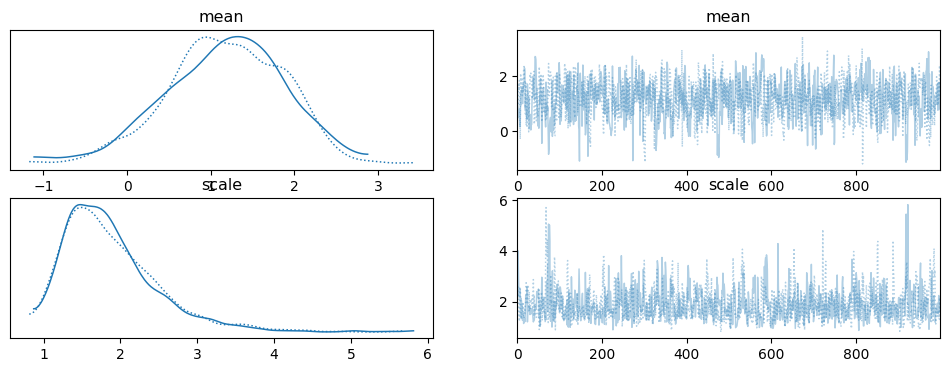

In [ ]:
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive
from numpyro.diagnostics import hpdi
from scipy.stats import gaussian_kde

import jax
import jax.numpy as jnp

import arviz as az

import matplotlib.pyplot as plt

def model(data):

    # Define prior distributions for model parameters
    mean = numpyro.sample("mean", dist.Normal(0, 1))
    scale = numpyro.sample("scale", dist.Exponential(1))

    # Define likelihood with a data plate
    with numpyro.plate("data_plate", len(data)):
        obs = numpyro.sample("obs", dist.Normal(mean, scale), obs=data)


nuts_kernel = NUTS(model)

# data
data = jnp.array([2.3, 3.9, 1.7, -0.8, 2.5])

mcmc = MCMC(nuts_kernel, num_samples=1000, num_warmup=1000, num_chains=2, chain_method='parallel', progress_bar=False)
mcmc.run(jax.random.PRNGKey(0), data)

# Get the posterior samples
posterior_samples = mcmc.get_samples()

# Print summary statistics of posterior
mcmc.print_summary()

# Viosualise posterior distributions and trace plots
az.plot_trace(mcmc)

In [ ]:
# Use Predictive to generate predictions
predictive = Predictive(model, posterior_samples)
predictions = predictive(jax.random.PRNGKey(1), data=data)

# Print predictions
print(predictions)

{'obs': Array([[ 2.3,  3.9,  1.7, -0.8,  2.5],
       [ 2.3,  3.9,  1.7, -0.8,  2.5],
       [ 2.3,  3.9,  1.7, -0.8,  2.5],
       ...,
       [ 2.3,  3.9,  1.7, -0.8,  2.5],
       [ 2.3,  3.9,  1.7, -0.8,  2.5],
       [ 2.3,  3.9,  1.7, -0.8,  2.5]], dtype=float32)}


In [ ]:
# Use HPDI to the posterior samples
hpdi_values_mean = hpdi(posterior_samples['mean'], 0.95)
hpdi_values_scale = hpdi(posterior_samples['scale'], 0.95)

# Print the HPDI values
print("HPDI for mean parameter:", hpdi_values_mean)
print("HPDI for scale parameter:", hpdi_values_scale)


HPDI for mean parameter: [-0.16720782  2.4644678 ]
HPDI for scale parameter: [0.97064567 3.145492  ]


#Case of the Point estimates for Bernoulli-beta coin flips:

<ipython-input-141-70ef59520085>:27: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(kernel, num_warmup=1000, num_samples=2000, num_chains=4)
sample: 100%|██████████| 3000/3000 [00:01<00:00, 2215.95it/s, 3 steps of size 9.60e-01. acc. prob=0.93]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         p      0.61      0.05      0.61      0.53      0.69   3084.07      1.00

Number of divergences: 0


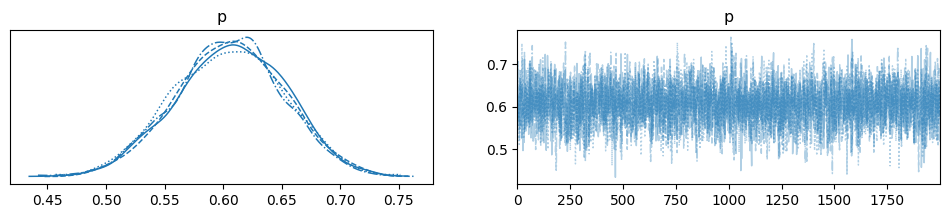

In [ ]:
n = 100    # number of trials
h = 61     # number of successes
alpha = 2  # hyperparameters
beta = 2

niter = 1000


rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)

# Model

def model(n, alpha=2, beta=2, h=None):

    # prior on the probability of success p
    p = numpyro.sample('p', dist.Beta(alpha, beta))


    numpyro.sample('obs', dist.Binomial(n, p), obs=h)


# specify inference algorithm
kernel = NUTS(model)

# define number of samples and number chains
mcmc = MCMC(kernel, num_warmup=1000, num_samples=2000, num_chains=4)

#run MCMC
mcmc.run(rng_key_, n=n, h=h)

# Print summary statistics of posterior
mcmc.print_summary()

# Viosualise posterior distributions and trace plots
az.plot_trace(mcmc)

# exatract samples of parameter p
p_samples = mcmc.get_samples()
p_posterior_samples = p_samples['p']


In [ ]:
# Prior predictive

prior_predictive = Predictive(model, num_samples=1000)
prior_predictions = prior_predictive(rng_key_, n)
prior_predictions.keys()

# extract samples for 'p'
pred_obs = prior_predictions['p']

# Summary statistics for the samples of `p`
mean_prior_pred = jnp.mean(pred_obs, axis=0)
hpdi_prior_pred = hpdi(pred_obs, 0.89)

print("mean_prior_pred:",mean_prior_pred)
print("hpdi_prior_pred:",hpdi_prior_pred)

mean_prior_pred: 0.50061375
hpdi_prior_pred: [0.14021917 0.8665916 ]


In [ ]:
# Posterior

predictive = Predictive(model, p_samples)
posterior_predictions = predictive(rng_key_, n=n)

# extract prediction and calculate summary statistics
post_obs = posterior_predictions['obs']
mean_post_pred = jnp.mean(post_obs, axis=0)
hpdi_post_pred = hpdi(post_obs, 0.9)

print("mean_post_pred:", mean_post_pred)
print("hpdi_post_pred:",hpdi_post_pred)

mean_post_pred

hpdi_post_pred

mean_post_pred: 60.56138
hpdi_post_pred: [49 71]


array([49, 71], dtype=int32)

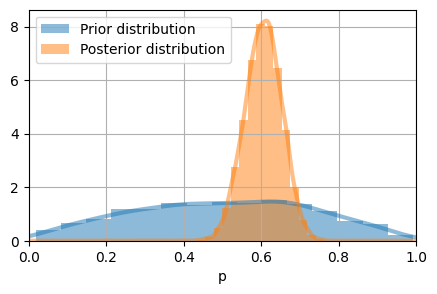

In [ ]:
fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.hist(pred_obs, bins=15, density=True, alpha=0.5, label = "Prior distribution")
ax.hist(p_posterior_samples, bins=15, density=True, alpha=0.5, label = "Posterior distribution")
x = jnp.linspace(0, 1, 3000)
kde = gaussian_kde(pred_obs)
ax.plot(x, kde(x), color='C0', lw=3, alpha=0.5)
kde = gaussian_kde(p_posterior_samples)
ax.plot(x, kde(x), color='C1', lw=3, alpha=0.5)
ax.set_xlabel('p')
ax.set_xlim(0, 1)
ax.grid(0.3)
plt.legend()
plt.show()

#Focus on priors

#Task

Implement a Beta prior for this case with parameters
. How does posterior depend on these parameters?

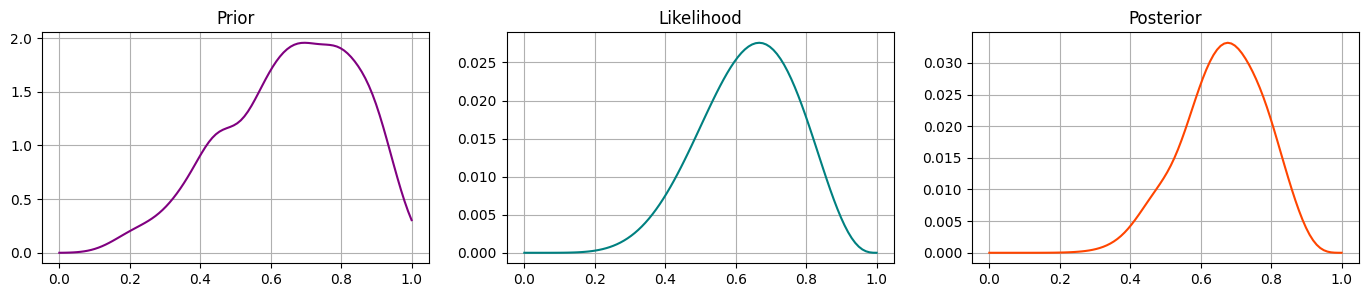

In [ ]:
import jax.numpy as jnp
import numpyro.distributions as dist
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


# Given parameters
h = 6
n = 9
grid_points = 100
p_grid = jnp.linspace(0, 1, grid_points)

# Define the alpha and beta parameters for the Beta prior
alpha = 4
beta = 2

# Define the likelihood function
def likelihood(h, n, p_grid):
    # compute likelihood at each point in the grid
    log_prob_likelihood = dist.Binomial(n, probs=p_grid).log_prob(h)
    # normalize likelihood to get the likelihood PMF
    likelihood_pmf = jnp.exp(log_prob_likelihood - jnp.max(log_prob_likelihood)) / jnp.sum(jnp.exp(log_prob_likelihood - jnp.max(log_prob_likelihood)))
    return likelihood_pmf

# Define the Beta prior distribution
def prior_beta(alpha, beta, p_grid):
    # sample from the Beta distribution
    samples = dist.Beta(alpha, beta).sample(random.PRNGKey(0), (1000,))
    # estimate the density using kernel density estimation (KDE)
    kde = gaussian_kde(samples)
    prior_beta = kde(p_grid)
    return prior_beta

# Define the function to compute posterior
def computePosterior(likelihood, prior):
    # Compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # Standardize posterior
    posterior = unstd_posterior / jnp.sum(unstd_posterior)

    # Plot the prior, likelihood, and posterior
    plt.figure(figsize=(17, 3))
    ax1 = plt.subplot(131)
    ax1.set_title("Prior")
    ax1.grid(0.3)
    plt.plot(p_grid, prior, color='purple')

    ax2 = plt.subplot(132)
    ax2.set_title("Likelihood")
    ax2.grid(0.3)
    plt.plot(p_grid, likelihood, color='teal')

    ax3 = plt.subplot(133)
    ax3.set_title("Posterior")
    plt.plot(p_grid, posterior, color='orangered')
    ax3.grid(0.3)
    plt.show()

    return posterior


# Compute the likelihood
likelihood_pmf = likelihood(h, n, p_grid)

# Compute the Beta prior with specified parameters
prior = prior_beta(alpha, beta, p_grid)

# Compute and plot the posterior
posterior = computePosterior(likelihood_pmf, prior)


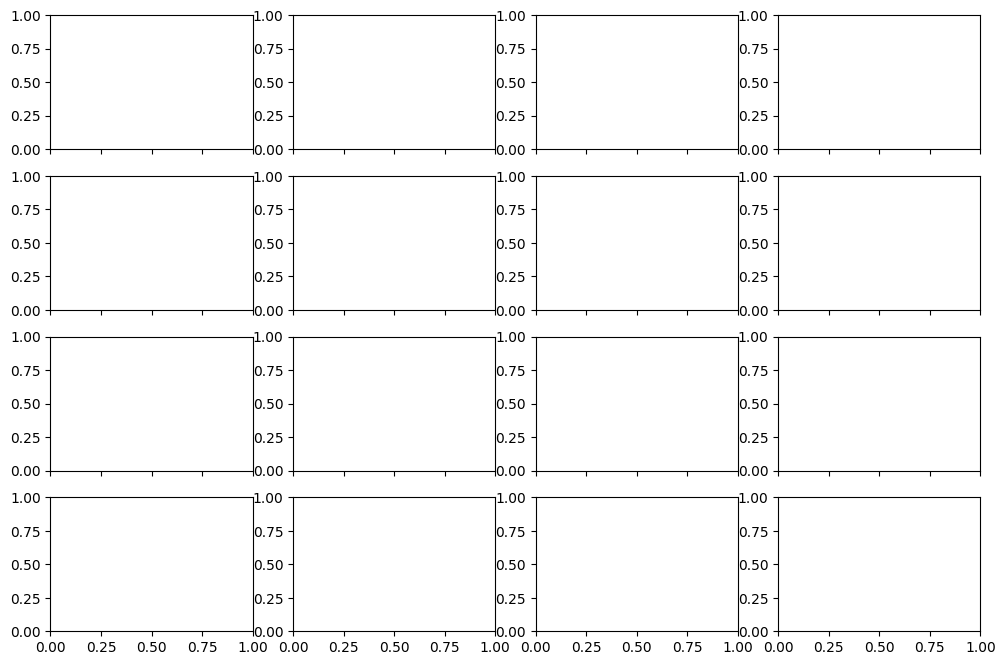

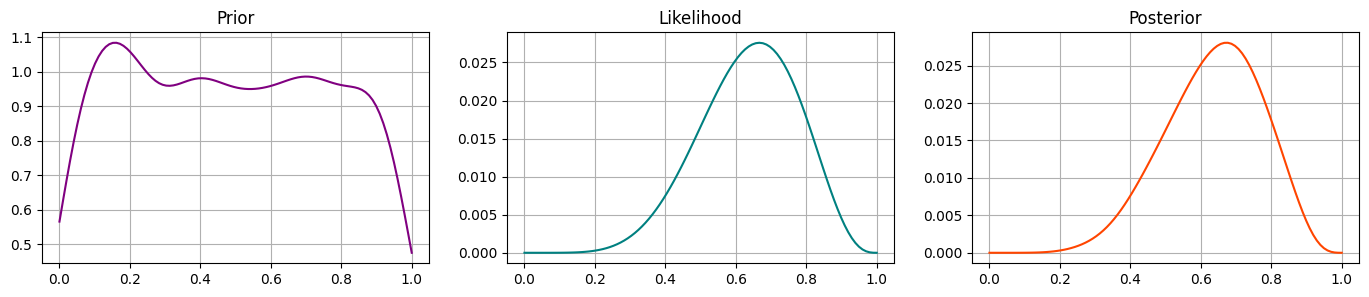

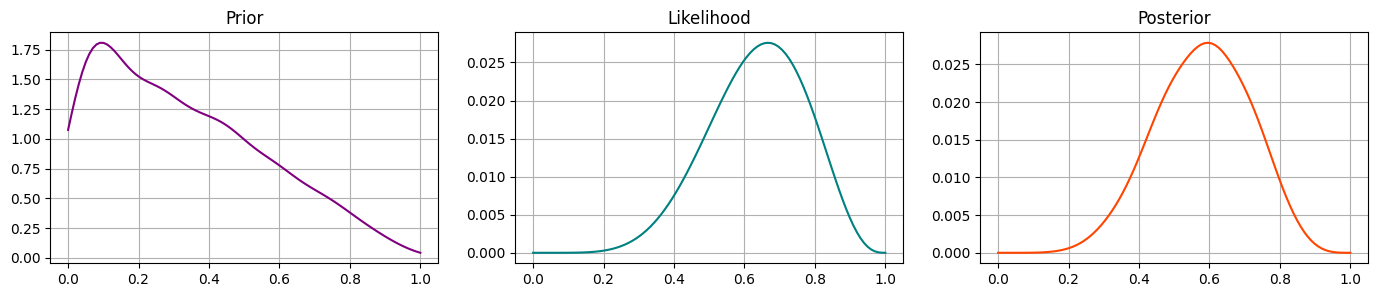

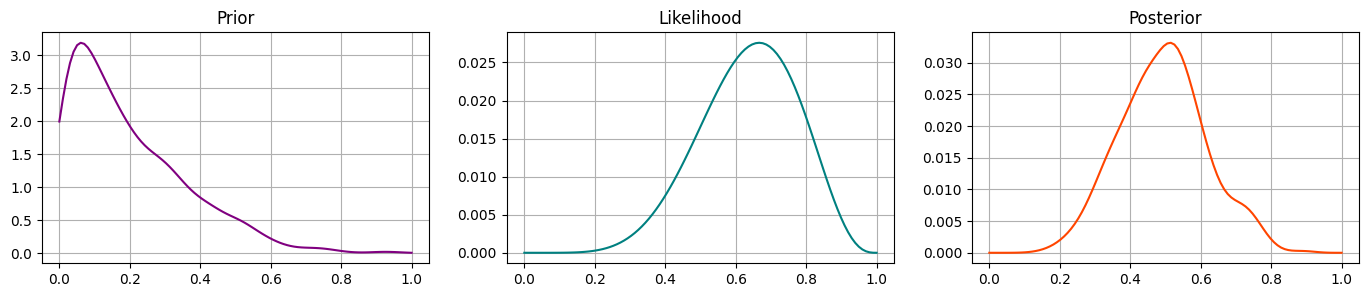

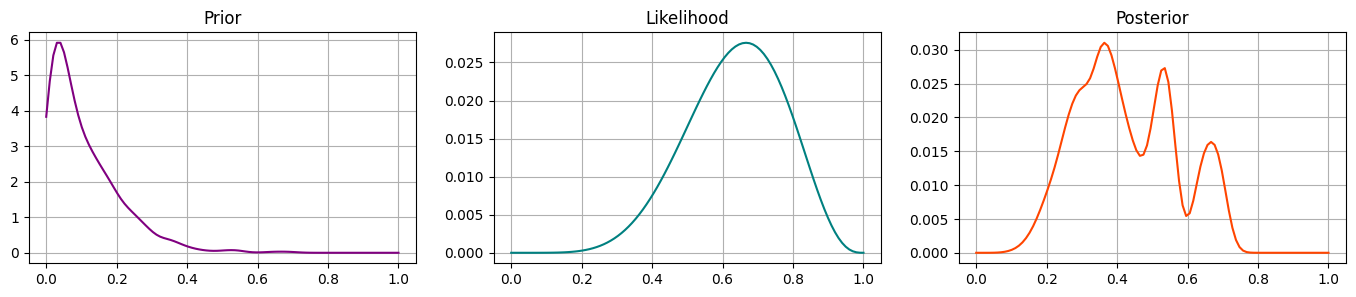

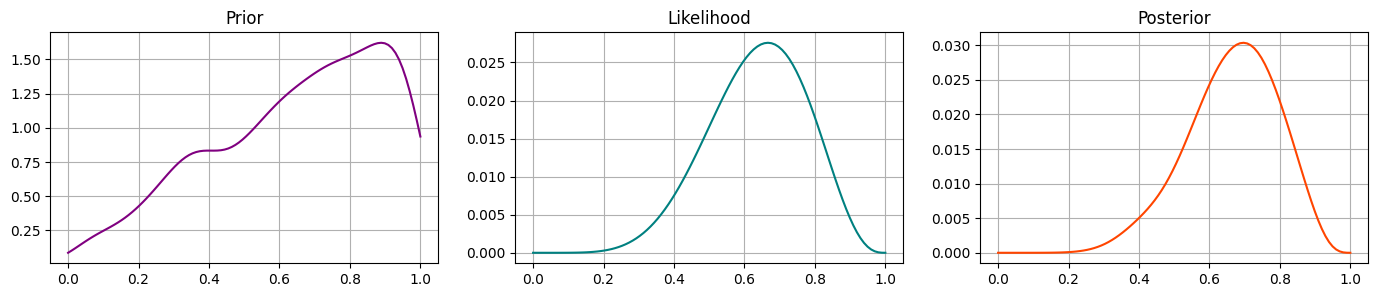

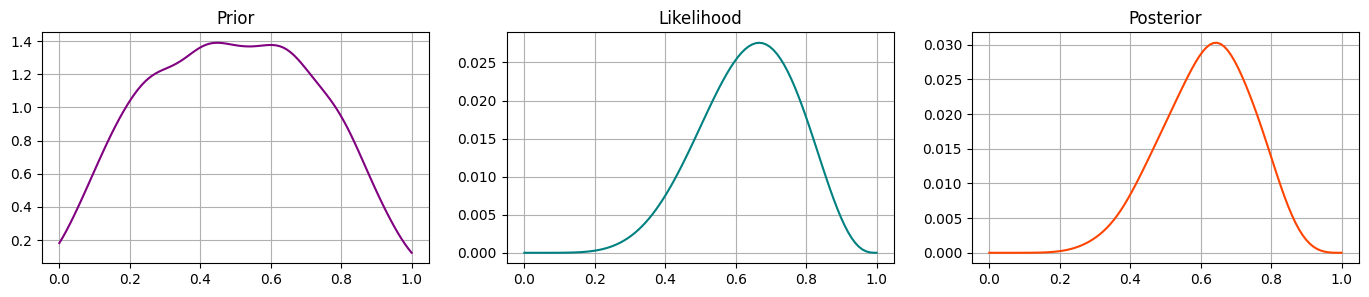

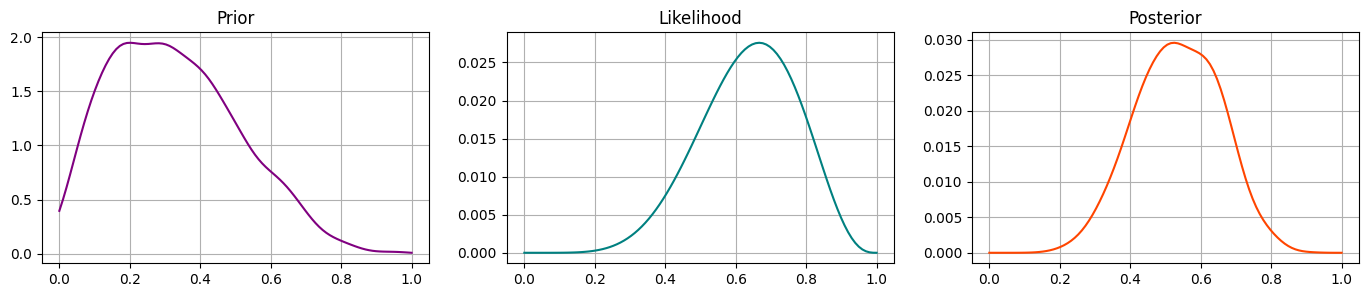

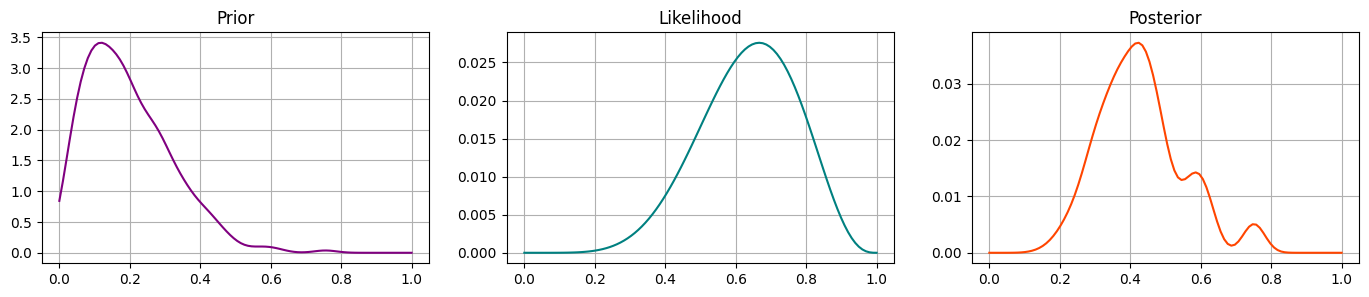

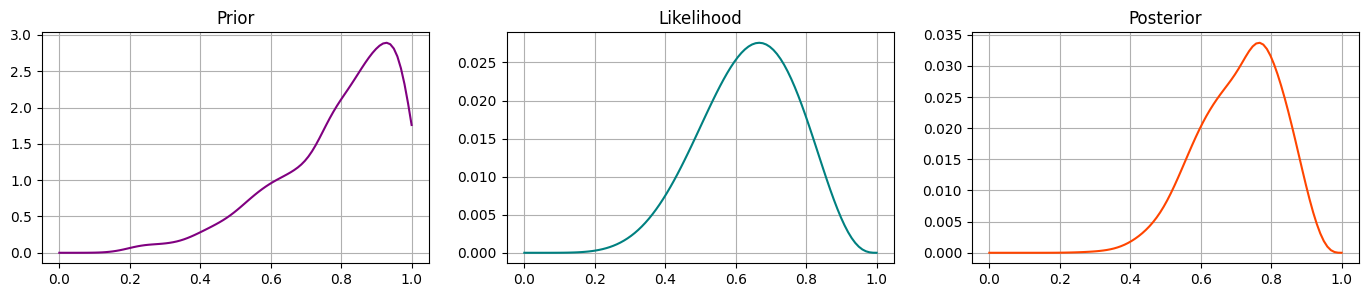

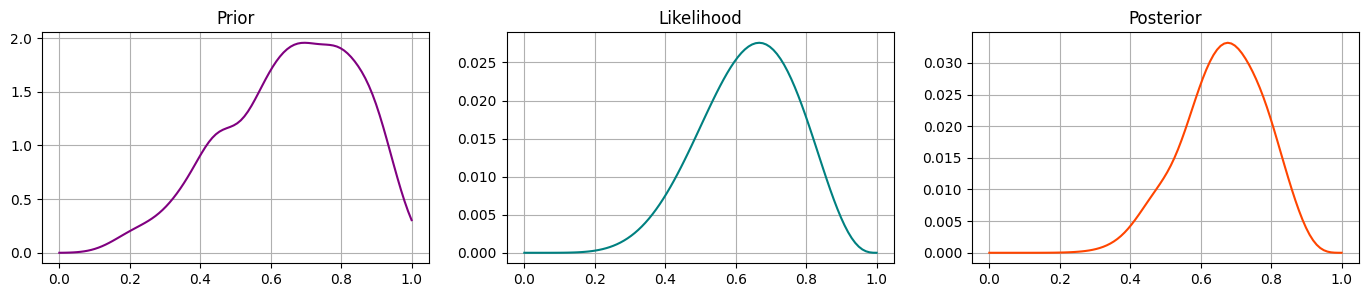

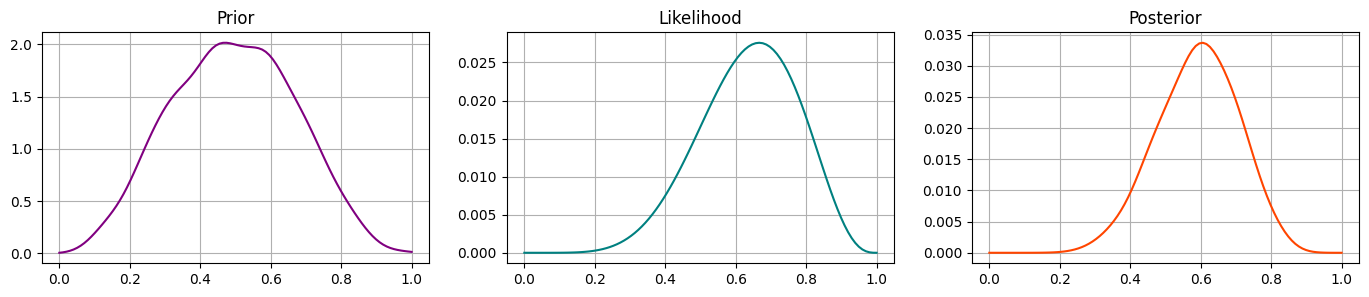

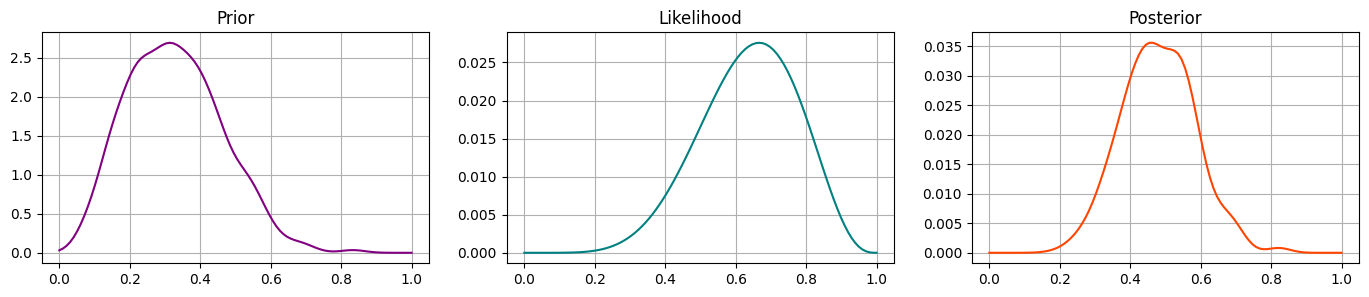

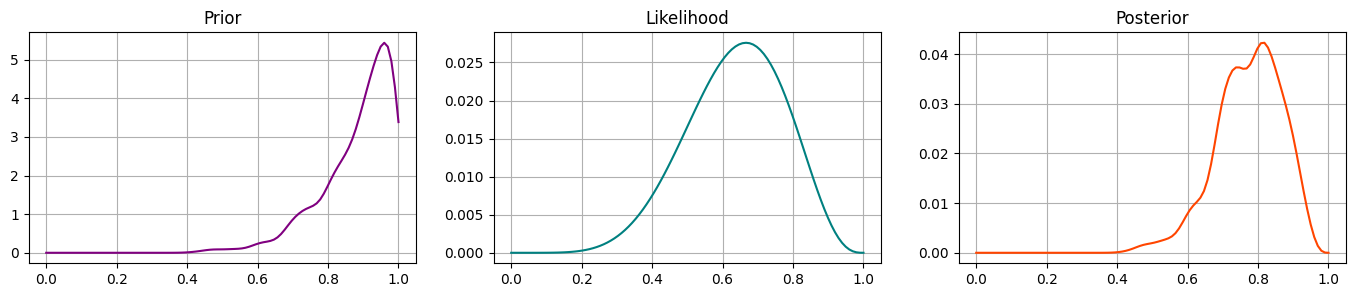

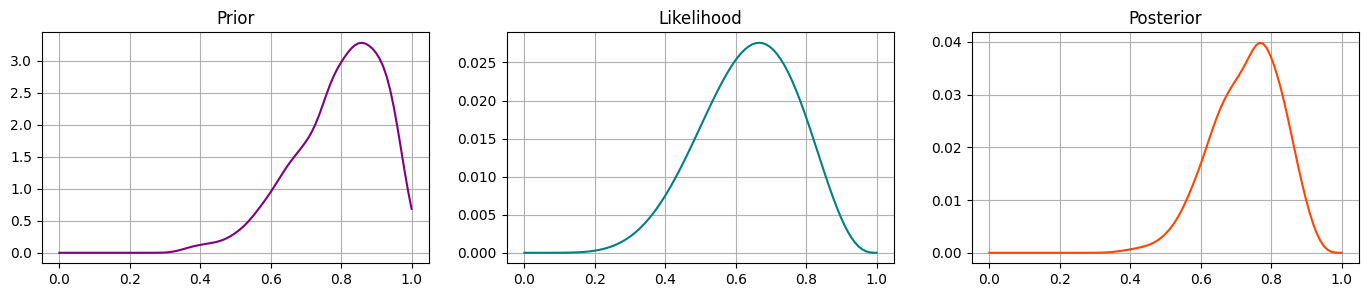

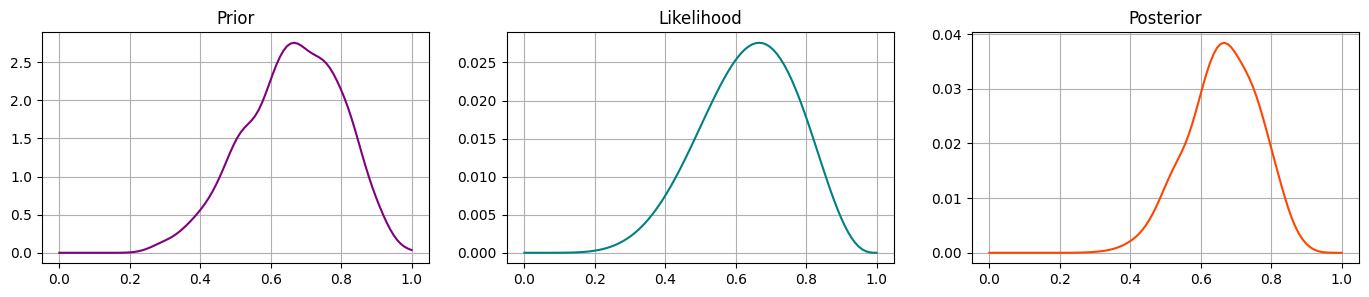

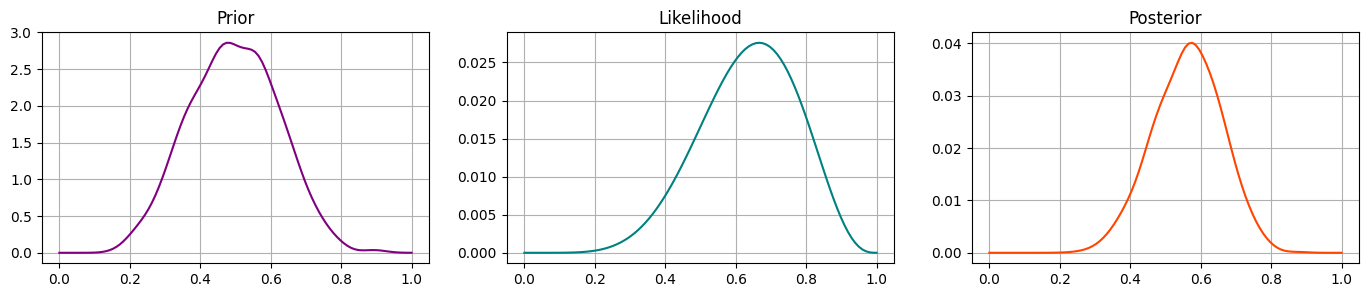

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define a range of values for alpha and beta
alphas = [1, 2, 4, 8]
betas = [1, 2, 4, 8]

# Plot the posterior distributions for different values of alpha and beta
fig, axs = plt.subplots(len(alphas), len(betas), figsize=(12, 8), sharex=True)
for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        # Compute the Beta prior with specified parameters
        prior = prior_beta(alpha, beta, p_grid)
        # Compute the posterior
        posterior = computePosterior(likelihood_pmf, prior)
        # Plot the posterior
        axs[i, j].plot(p_grid, posterior, color='orangered')
        axs[i, j].set_title(f'alpha = {alpha}, beta = {beta}')
        axs[i, j].grid(True)
plt.tight_layout()
plt.show()

